<a href="https://colab.research.google.com/github/Yogesh11-12/CNN-Mnist-data/blob/main/LSTM_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from keras.models import Model
from keras.layers import LSTM,Dense,Input,TimeDistributed
from keras.datasets import mnist
import keras

In [19]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [66]:
#reshape Data to Heirarichal RNN
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print('test_data shape: ',x_test.shape)

test_data shape:  (10000, 28, 28, 1)


In [21]:
#convert class vector to binary
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
row,cols,pixel=x_train.shape[1:]
print(row,cols,pixel)

28 28 1


In [22]:
input=Input(shape=(row,cols,pixel))
layer1=TimeDistributed(LSTM(128))(input)
layer2=LSTM(128)(layer1)
layer3=Dense(10,activation='softmax')(layer2)
model=Model(input,layer3)

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['Accuracy'])

In [24]:
from keras.callbacks import EarlyStopping
model_hist=model.fit(x_train,y_train,batch_size=120,epochs=15,validation_data=(x_test,y_test),callbacks=[EarlyStopping(patience=2)])

Epoch 1/15
500/500 [==============================] - 22s 28ms/step - loss: 1.2197 - accuracy: 0.0000e+00 - val_loss: 0.2629 - val_accuracy: 0.0000e+00
Epoch 2/15
500/500 [==============================] - 13s 27ms/step - loss: 0.2396 - accuracy: 0.0000e+00 - val_loss: 0.1011 - val_accuracy: 0.0000e+00
Epoch 3/15
500/500 [==============================] - 13s 27ms/step - loss: 0.1173 - accuracy: 0.0000e+00 - val_loss: 0.2055 - val_accuracy: 0.0000e+00
Epoch 4/15
500/500 [==============================] - 14s 27ms/step - loss: 0.0807 - accuracy: 0.0000e+00 - val_loss: 0.0546 - val_accuracy: 0.0000e+00
Epoch 5/15
500/500 [==============================] - 14s 27ms/step - loss: 0.0619 - accuracy: 0.0000e+00 - val_loss: 0.0514 - val_accuracy: 0.0000e+00
Epoch 6/15
500/500 [==============================] - 14s 28ms/step - loss: 0.0496 - accuracy: 0.0000e+00 - val_loss: 0.0534 - val_accuracy: 0.0000e+00
Epoch 7/15
500/500 [==============================] - 14s 28ms/step - loss: 0.0442 - acc

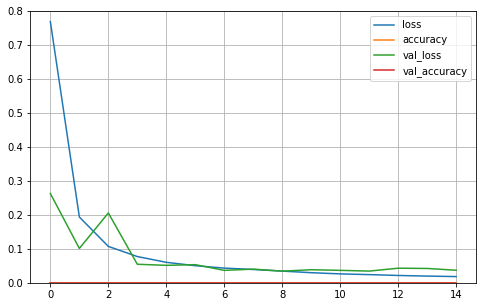

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.8)
plt.show()

In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0369 - accuracy: 0.0000e+00


[0.03694143891334534, 0.0]

In [45]:
predict=model.predict(x_test)
print(predict)


[[7.3472023e-07 1.0014246e-05 2.3068264e-06 ... 9.9991834e-01
  2.5182965e-07 2.2947004e-05]
 [1.6496527e-07 3.5188327e-07 9.9998283e-01 ... 1.4041111e-05
  4.8092659e-07 9.3182315e-09]
 [2.2433899e-06 9.9997818e-01 3.0464670e-07 ... 2.5986133e-06
  1.1719621e-05 4.3958454e-07]
 ...
 [2.5251160e-07 1.4475038e-06 1.8805413e-07 ... 1.4063297e-06
  2.7941689e-07 1.4021235e-04]
 [5.0456109e-08 9.5282843e-08 9.4464021e-08 ... 9.1931227e-09
  3.0576295e-05 5.8748179e-07]
 [4.4515677e-06 2.8309452e-07 3.1069473e-07 ... 2.6389788e-08
  2.9221840e-06 7.8370057e-08]]


In [42]:
import numpy as np
print(np.argmax(np.round(predict[1])))

2


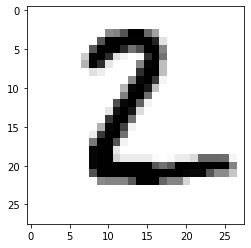

In [43]:
plt.imshow(x_test[1].reshape(28,28),cmap=plt.cm.binary)
plt.show()

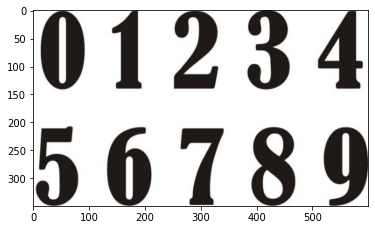

In [60]:
from matplotlib import image
import matplotlib.pyplot as plt
img=image.imread('/content/numbers.jpg')
plt.imshow(img)


In [104]:
from keras.preprocessing import image
test_image_path=r'/content/Nine.jpg'

test_image=image.load_img(test_image_path,color_mode='grayscale',target_size=(28,28))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)



In [105]:
test_image.shape

(1, 28, 28, 1)

In [106]:
test_image/=255


In [109]:
print(np.argmax(np.round(model.predict(test_image))))

8
